In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
from collections import defaultdict

def dijkstra_with_path(edges, source, target):
    # Build adjacency list
    graph = defaultdict(list)
    for u, v, w in edges:
        graph[u].append((v, w))
        graph[v].append((u, w))  # undirected

    # Distances + parent pointers
    dist = {node: float('inf') for node in graph}
    dist[source] = 0
    parent = {node: None for node in graph}

    pq = [(0, source)]
    visited = set()

    while pq:
        d, u = heapq.heappop(pq)
        if u in visited:
            continue
        visited.add(u)

        if u == target:
            break

        for v, w in graph[u]:
            if v not in visited:
                new_dist = d + w
                if new_dist < dist[v]:
                    dist[v] = new_dist
                    parent[v] = u
                    heapq.heappush(pq, (new_dist, v))

    # Reconstruct path
    path = []
    node = target
    while node is not None:
        path.append(node)
        node = parent[node]
    path.reverse()

    return dist[target], path


def plot_graph_with_path(edges, source, target):
    # Run Dijkstra
    dist, path = dijkstra_with_path(edges, source, target)

    # Build graph in NetworkX
    G = nx.Graph()
    G.add_weighted_edges_from(edges)

    pos = nx.spring_layout(G, seed=42)  # consistent layout

    # Plot original graph
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800, font_size=10)
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Original Graph with Weights")

    # Plot shortest path
    plt.subplot(1, 2, 2)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800, font_size=10)

    # Highlight shortest path edges
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=3)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="orange", node_size=800)

    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(f"Shortest Path from {source} to {target}\nLength = {dist}")

    plt.show()


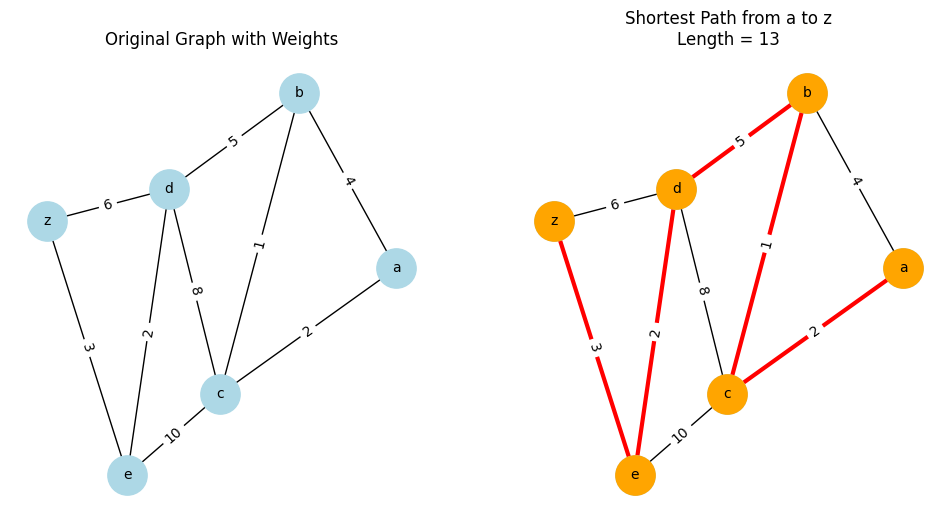

In [4]:
edges = [
    ('a', 'b', 4),
    ('a', 'c', 2),
    ('b', 'c', 1),
    ('b', 'd', 5),
    ('c', 'd', 8),
    ('c', 'e', 10),
    ('d', 'e', 2),
    ('d', 'z', 6),
    ('e', 'z', 3)
]

plot_graph_with_path(edges, 'a', 'z')